In [2]:
import sys
sys.path.append('..')
from features_extractor import MinigridFeaturesExtractor
sys.path.append('../eval/')
from eval_ppo import Eval_PPO
import minigrid
from minigrid.wrappers import ImgObsWrapper
from stable_baselines3 import PPO
import gymnasium as gym
import matplotlib.pyplot as plt
import os

## Setup Workspace

In [3]:
MODELS_DIR = "./models/"
RESULTS_DIR = "./results/"
os.makedirs(MODELS_DIR, exist_ok=True)
os.makedirs(RESULTS_DIR, exist_ok=True)

# Train CNN Agent

In [6]:
policy_kwargs = dict(
    features_extractor_class=MinigridFeaturesExtractor,
    features_extractor_kwargs=dict(features_dim=128),
)
env = gym.make("MiniGrid-Unlock-v0", render_mode="rgb_array")
env = ImgObsWrapper(env)
model = PPO("CnnPolicy", env, policy_kwargs=policy_kwargs)
model.learn(1e6, progress_bar=True)
model.save(MODELS_DIR + "unlock_cnn")

Output()

## Train Mlp Agent

In [5]:
env = gym.make("MiniGrid-Unlock-v0", render_mode="rgb_array")
env = ImgObsWrapper(env)
model = PPO("MlpPolicy", env)
model.learn(1e6, progress_bar=True)
model.save(MODELS_DIR + "unlock_mlp")

Output()

## Eval Mlp Agent

eval_ep: 100/100 | current_reward: 0 | total_rewards: 59.00937500937599999999624999999996
finished evaluating 100 eps. total_rewards: 59.009375


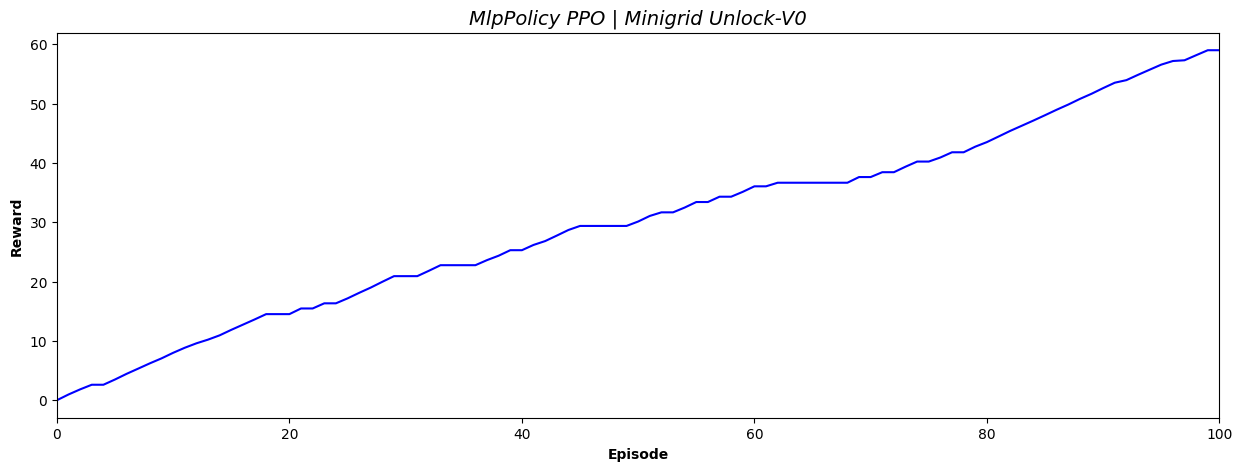

In [8]:
env = gym.make("MiniGrid-Unlock-v0", render_mode="rgb_array")
env = ImgObsWrapper(env)
model = PPO.load(MODELS_DIR + "unlock_mlp")
Eval_PPO(
    env,
    model,
    100,
    "MlpPolicy PPO | Minigrid Unlock-V0",
    "blue"
)

# Eval CNN Agent

eval_ep: 100/100 | current_reward: 0.96875 | total_rewards: 96.640624999999974
finished evaluating 100 eps. total_rewards: 96.64062499999997


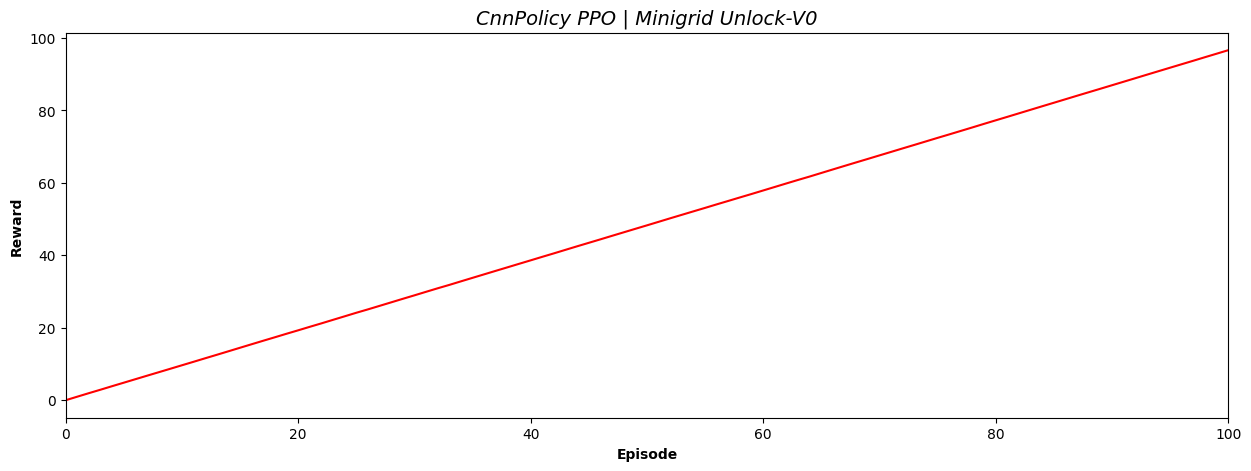

In [9]:
env = gym.make("MiniGrid-Unlock-v0", render_mode="rgb_array")
env = ImgObsWrapper(env)
model = PPO.load(MODELS_DIR + "unlock_cnn")
Eval_PPO(
    env,
    model,
    100,
    "CnnPolicy PPO | Minigrid Unlock-V0",
    "red"
)

With a 97% success rate compared to the Mlp's 59%, we can see the better option is to use the CNN Feature Extractor. 